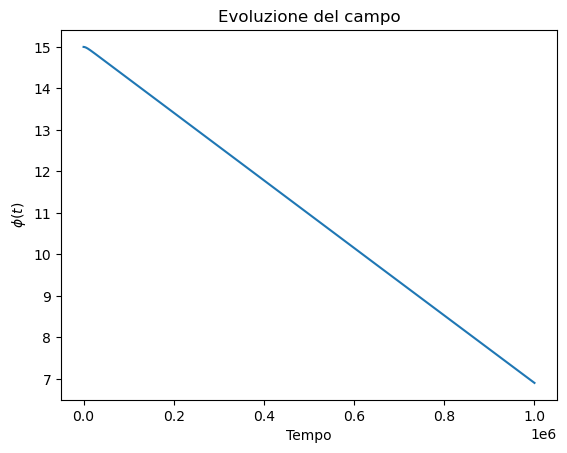

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Impostazioni del potenziale (unità in cui M_pl = 1)
m = 1e-5

def potential(phi):
    return 0.5 * m**2 * phi**2

def potential_prime(phi):
    return m**2 * phi

def Hubble(phi, phidot):
    # Calcolo dell'argomento: deve rimanere non negativo
    arg = (0.5 * phidot**2 + potential(phi)) / 3
    if np.any(arg < 0):
        print("Attenzione: argomento negativo in sqrt", arg)
    return np.sqrt(arg)

def equations(t, y):
    phi, phidot = y
    H = Hubble(phi, phidot)
    return [phidot, -3*H*phidot - potential_prime(phi)]

t_start, t_end = 0, 1e6
t_eval = np.linspace(t_start, t_end, 1000)
y0 = [15, 0]

sol = solve_ivp(equations, (t_start, t_end), y0, t_eval=t_eval, rtol=1e-9, atol=1e-12)

# Calcolo delle quantità slow roll
phi = sol.y[0]
phidot = sol.y[1]
H_vals = Hubble(phi, phidot)
epsilon = 0.5 * phidot**2 / (H_vals**2)


plt.plot(sol.t, phi)
plt.xlabel("Tempo")
plt.ylabel(r"$\phi(t)$")
plt.title("Evoluzione del campo")

plt.show()


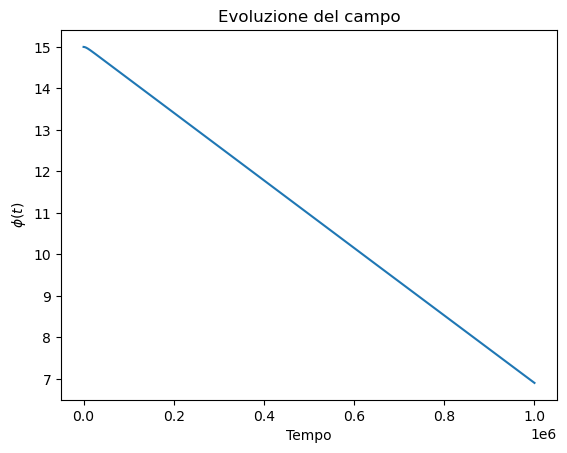

In [8]:
y01 = [15, 1e-6]

sol1 = solve_ivp(equations, (t_start, t_end), y01, t_eval=t_eval, rtol=1e-9, atol=1e-12)

# Calcolo delle quantità slow roll
phi1 = sol.y[0]
phidot1 = sol.y[1]
H_vals1 = Hubble(phi, phidot)
epsilon1 = 0.5 * phidot**2 / (H_vals**2)


plt.plot(sol1.t, phi1)
plt.xlabel("Tempo")
plt.ylabel(r"$\phi(t)$")
plt.title("Evoluzione del campo")

plt.show()
